In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

In [2]:
# Loading the dataset
anxiety_df = pd.read_csv('anxiety_attack_dataset.csv')

In [3]:
# Information about dataset
anxiety_df.info()
anxiety_df.isnull().sum()
anxiety_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

,ID,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Severity of Anxiety Attack (1-10)
count,12000.00000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,40.96675,6.482650,5.030892,246.696083,9.492833,5.462250,119.398500,25.462333,2.987417,4.518417,5.497333,5.507583
std,3464.24595,13.47328,2.014885,2.889000,144.487071,5.769364,2.897201,34.806711,8.090686,1.414482,2.866010,2.867579,2.858663
min,1.00000,18.00000,3.000000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,3000.75000,29.00000,4.800000,2.500000,122.000000,5.000000,3.000000,89.000000,18.000000,2.000000,2.000000,3.000000,3.000000
50%,6000.50000,41.00000,6.500000,5.000000,244.000000,9.000000,5.000000,119.000000,25.000000,3.000000,5.000000,5.000000,6.000000
75%,9000.25000,53.00000,8.200000,7.525000,371.000000,15.000000,8.000000,149.000000,32.000000,4.000000,7.000000,8.000000,8.000000
max,12000.00000,64.00000,10.000000,10.000000,499.000000,19.000000,10.000000,179.000000,39.000000,5.000000,9.000000,10.000000,10.000000


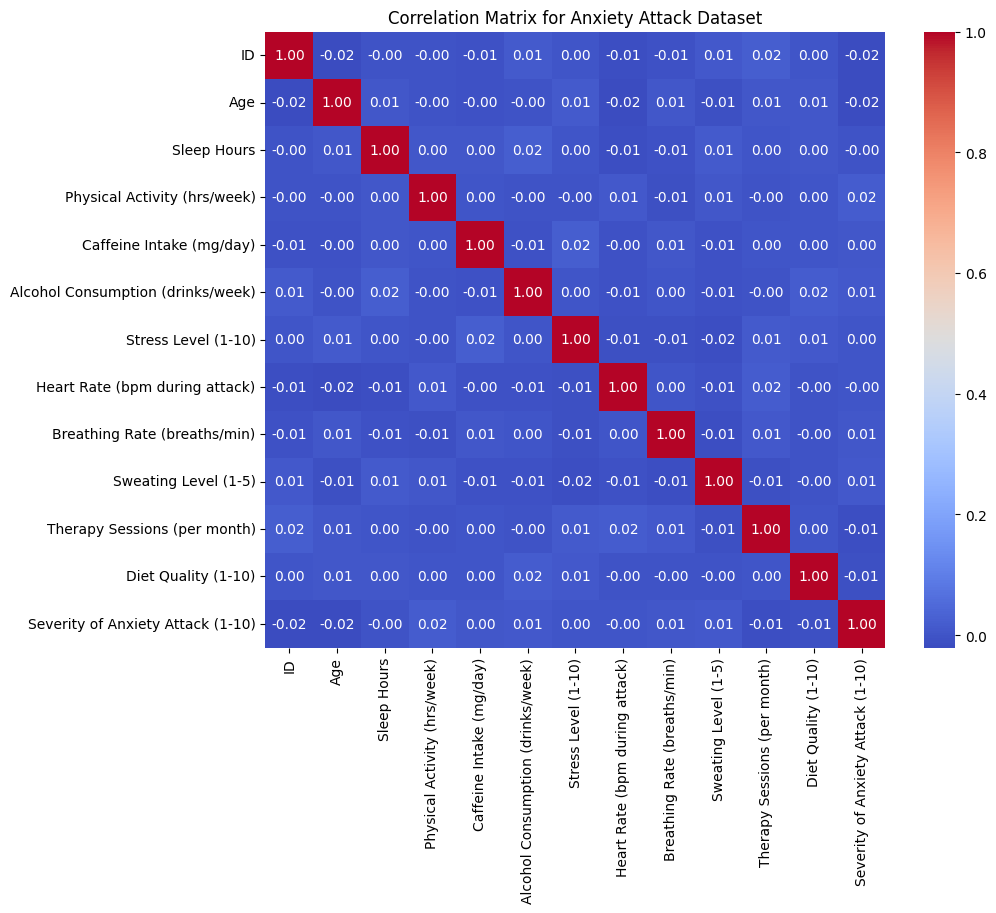

In [4]:
# Correlation Heatmap to get a visual of the relationships
plt.figure(figsize=(10, 8))
sns.heatmap(anxiety_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Anxiety Attack Dataset')
plt.show()

# Data Preprocessing

In [5]:
# Encoding for variables that are ordinal
label_encoder = LabelEncoder()
anxiety_df['Stress Level (1-10)'] = label_encoder.fit_transform(anxiety_df['Stress Level (1-10)'])
anxiety_df['Sweating Level (1-5)'] = label_encoder.fit_transform(anxiety_df['Sweating Level (1-5)'])

In [6]:
# Encoding for variables that are categorial
categorical_cols = ['Gender', 'Occupation', 'Therapy Sessions (per month)', 'Medication',
                    'Smoking', 'Family History of Anxiety', 'Dizziness', 'Recent Major Life Event']

for col in categorical_cols:
    anxiety_df[col] = label_encoder.fit_transform(anxiety_df[col])

In [7]:
# Standardizing numeric columns to treat all features equally
numeric_cols = anxiety_df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
anxiety_df[numeric_cols] = scaler.fit_transform(anxiety_df[numeric_cols])

In [8]:
# Dropping unnecessery column
anxiety_df_cleaned = anxiety_df.copy()
anxiety_df_cleaned.drop('ID', axis=1, inplace=True)

# Feature Selection (0.5 point)

In [9]:
# Seperating features
X = anxiety_df_cleaned.drop('Severity of Anxiety Attack (1-10)', axis=1)
y = anxiety_df_cleaned['Severity of Anxiety Attack (1-10)']

In [10]:
# Backward feature selection using recursive feature elimination with random forest
rfe_selector = RFE(estimator=RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=10)
rfe_selector.fit(X, y)

RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=10)

In [11]:
# Selecting the top features
selected_features = X.columns[rfe_selector.support_]
X_selected = X[selected_features]
print(selected_features)

Index(['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
       'Stress Level (1-10)', 'Heart Rate (bpm during attack)',
       'Breathing Rate (breaths/min)', 'Therapy Sessions (per month)',
       'Diet Quality (1-10)'],
      dtype='object')


In [12]:
# Splitting into traning and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Random Forest Model ( 1 point)

In [13]:
# Random forest on the traning data to improve prediction accuracy
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Gradient Boosting Model (1 point)

In [14]:
# Gradient boosting on the traning data to improve performance
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

# Lasso Regresion Model (1 point)

In [15]:
# Lasso Regression model to reduce overfitting
lasso = Lasso(alpha=0.0001, random_state=42)
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)

# Model Evaluation

In [16]:
# Defining a function to evaluate the models performance by printing Mean Squared Error and R^2 score
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Results:")
    print(f"  Mean Squared Error (MSE): {mse:.3f}")
    print(f"  R-Squared Score (R²): {r2:.3f}\n")

In [17]:
# Evaluating each model
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("Gradient Boosting", y_test, gb_preds)
evaluate_model("Lasso Regression", y_test, lasso_preds)

Random Forest Results:
  Mean Squared Error (MSE): 1.019
  R-Squared Score (R²): -0.025

Gradient Boosting Results:
  Mean Squared Error (MSE): 1.004
  R-Squared Score (R²): -0.010

Lasso Regression Results:
  Mean Squared Error (MSE): 0.996
  R-Squared Score (R²): -0.002



Text(0, 0.5, 'Features')

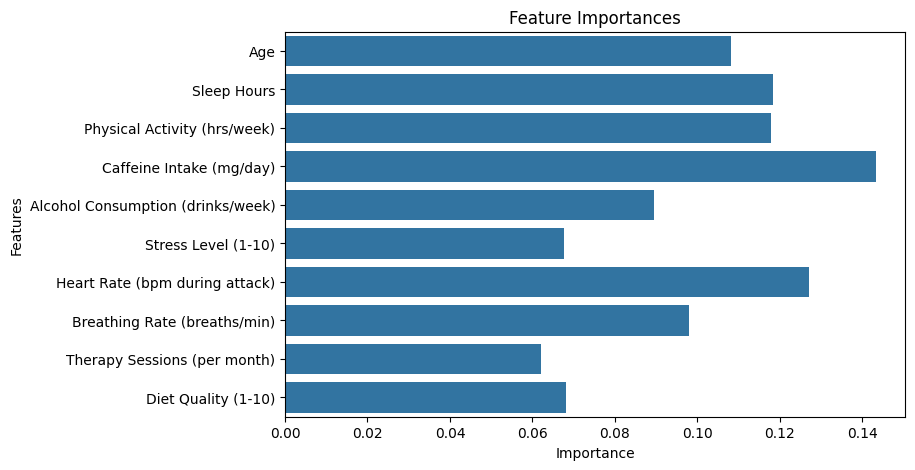

In [20]:
# Plotting feature importances from the Random Forest model to visualize which features contritubed most to predictions
importances = rf.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=selected_features)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')

# Bootstrap Confidence Intervals (0.5 point)


In [21]:
# Using bootstrapping to estimate 95% confidence intervals for the MSE of each model by resampling the test set 100 times.
models = {
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "Lasso Regression": lasso
}

bootstrap_results = {}

for name, model in models.items():
    mse_scores = []
    for _ in range(100):  # Bootstrap 100 samples
        X_resample, y_resample = resample(X_test, y_test)
        y_pred = model.predict(X_resample)
        mse = mean_squared_error(y_resample, y_pred)
        mse_scores.append(mse)

    lower = np.percentile(mse_scores, 2.5)
    upper = np.percentile(mse_scores, 97.5)
    bootstrap_results[name] = (lower, upper)

In [22]:
# Printing the 95% confidence interval ranges for MSE of each model based on bootstrap results
for name, (low, high) in bootstrap_results.items():
    print(f"{name} MSE 95% CI: {low:.3f} – {high:.3f}")

Random Forest MSE 95% CI: 0.988 – 1.053
Gradient Boosting MSE 95% CI: 0.970 – 1.039
Lasso Regression MSE 95% CI: 0.952 – 1.025


In [23]:
# Preparing model names, average MSE values, and error bars based on bootstrap confidence intervals for plotting
model_names = list(bootstrap_results.keys())
means = [mean_squared_error(y_test, models[name].predict(X_test)) for name in model_names]
error_bars = [(mean - bootstrap_results[name][0], bootstrap_results[name][1] - mean) for name, mean in zip(model_names, means)]

lower_errors, upper_errors = zip(*error_bars)


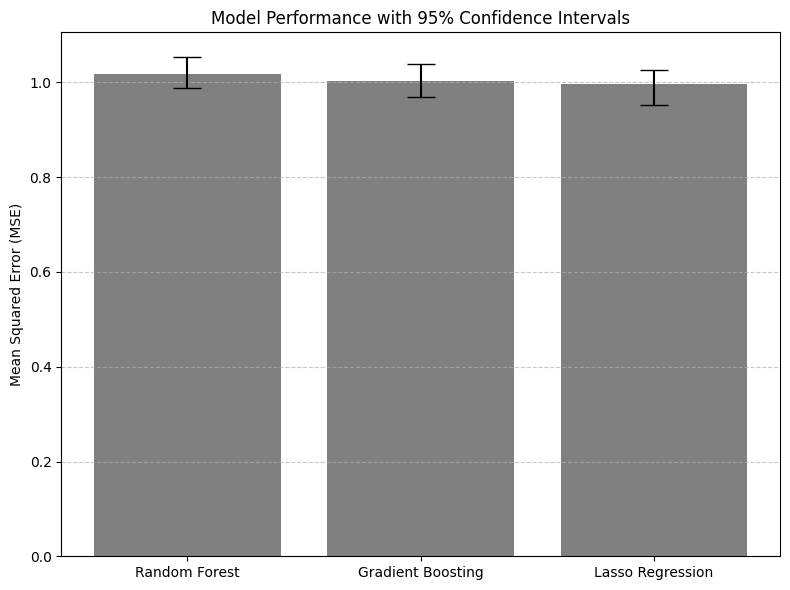

In [24]:
# Plotting average MSE model performances with error bars to visually compare performance
plt.figure(figsize=(8, 6))
plt.bar(model_names, means, yerr=[lower_errors, upper_errors], capsize=10, color='gray')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Performance with 95% Confidence Intervals')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()